# Titanic Survival Prediction with Logistic Regression

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project we build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Cleaning the Dataset

The data is obtained from Kaggle https://www.kaggle.com/c/titanic/data?select=test.csv.
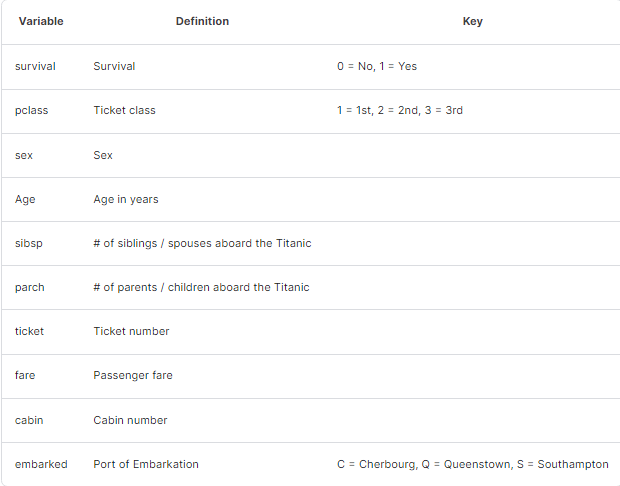

In [5]:
data = pd.read_csv('titanic_train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checking the number of missing values

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling Missing Data

Since most of the values in **Cabin** column is missing, we can drop this column

In [11]:
data = data.drop(columns='Cabin', axis=1)

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

**Age** column has 177 missing values, that is not many missing values, so we cannot drop this column.
We can replace all the missing values with the mean age value.

In [13]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Embarked** column has only 2 missing values. Its a categorical variable. We shall find the categorical value which has occured most number of times and then replace the missing values with them.

In [15]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
data['Embarked'].mode()[0]

'S'

In [17]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the missing values are taken care of

### Exploratory Data Analysis

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Finding the number of people who survived and did not survive

In [20]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Which gender had more survivers

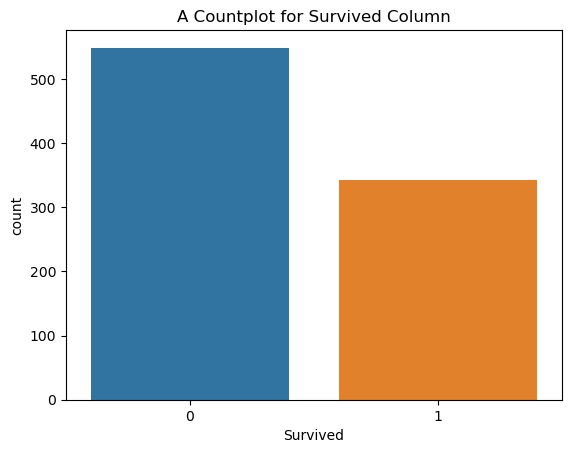

In [22]:
sns.countplot(data, x = 'Survived')
plt.title('A Countplot for Survived Column')
plt.show()

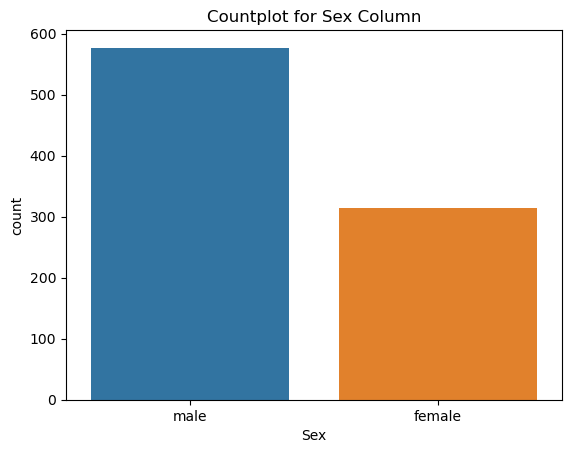

In [23]:
sns.countplot(data, x='Sex')
plt.title('Countplot for Sex Column')
plt.show()

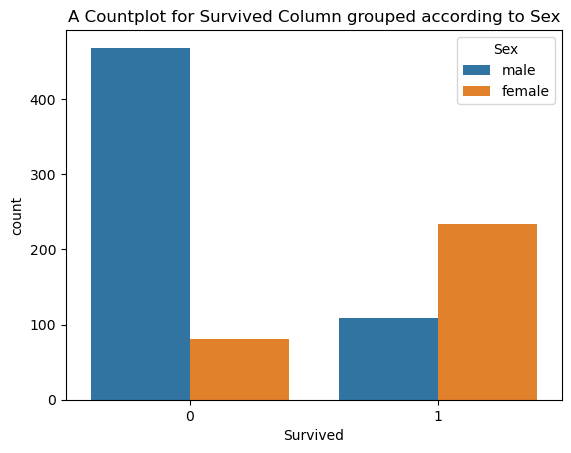

In [25]:
sns.countplot(data, x = 'Survived', hue='Sex')
plt.title('A Countplot for Survived Column grouped according to Sex')
plt.show()

**So even though in our dataset we see that number of males is higher than females, when it comes to survivors clearly more females survived.** During rescue mission the Females were given priority.

#### Which Passenger Class had more survivors

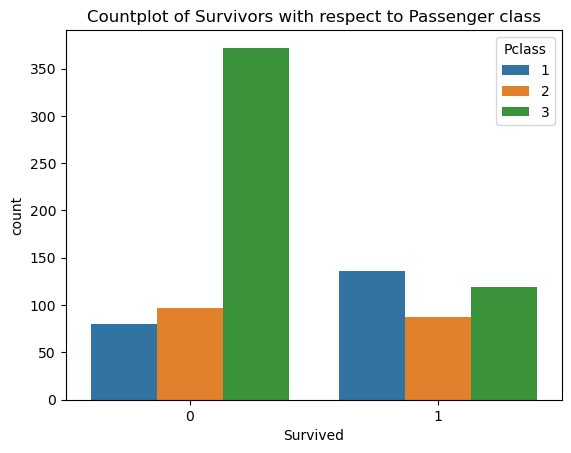

In [26]:
sns.countplot(data, x = 'Survived',hue='Pclass')
plt.title('Countplot of Survivors with respect to Passenger class')
plt.show()

**We see here that among survivors 1st class passengers were in majority. But then among those who died the 3rd class passengers were in big majority.** Most of the 3rd class passengers did not survive and most of the 1st class passengers survived. During the rescue mission 1st Class passengers received priority. 

#### Feature Engineering

If we look at the sex column it has object values which cannot be input in regression model. We have to replace them with binary values. Same with the Embarked column. 

In [28]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#### Splitting data into Target and Features

In [30]:
y = data['Survived']
X = data.drop(columns=['Name','PassengerId','Ticket','Survived'],axis=1)

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


#### Splitting Data into Training and Test Data

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


#### Model Training 

In [35]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\ADMIN\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

In [38]:
test_data_accuracy = accuracy_score(y_test, y_pred)
test_data_accuracy

0.7821229050279329

In [39]:
x_pred = model.predict(X_train)
train_data_accuracy = accuracy_score(y_train, x_pred)
train_data_accuracy

0.8075842696629213

**We see here that accuracy score from training data and test data is pretty close, so our model is not bad. If these scores would be very different our model may have been over or underfitted** 

### Conclusion

So from our Titanic dataset we used some features namely - Age, Sex, Pclass, Sibsp, Parch, Fare, Embarked with Logistic Regression to predict whether a passenger survived or not and we got a model with accuracy of 80%